In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import matthews_corrcoef, roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from itertools import cycle

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DarkMatter/dataset_criancas_V3.csv')

Mounted at /content/drive


In [3]:
df = df.drop('qseqid',axis =1)
df.head()

,length,GC,Pico_P2A,Fusion_gly,DNA_ligase_aden,DNA_ligase_OB,divDNApol,DNA_pol_B,TT_ORF2,TT_ORF1,...,Pneumovirus_M2,RSV_NS2,zf-CCCH_2,DUF755,Calici_coat,TMP_3,DUF4355,Baculo_PEP_C,Sipho_Gp157,taxname
0,2462,36.83,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Enterovirus
1,554,31.23,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,RSV
2,2579,32.29,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
3,2724,31.90,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Caudovirale
4,1124,56.49,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,TTV


In [4]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='taxname', y='Fusion_gly', s=32, alpha=.8, color = "red")
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_7' is not defined

In [5]:
print("Shape of the Dataset: {}".format(df.shape))

Shape of the Dataset: (97, 40)


<Axes: xlabel='taxname', ylabel='count'>

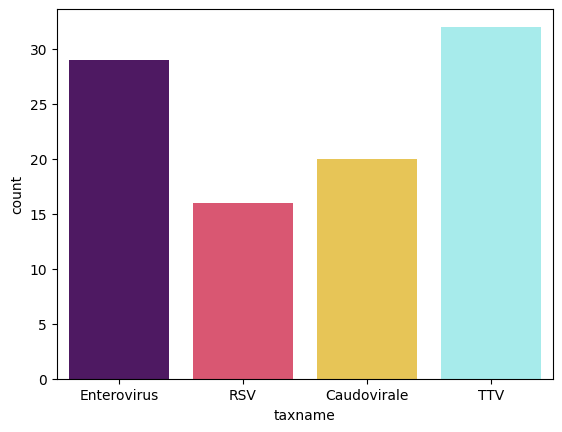

In [6]:
colors = ["#540D6E", "#ee4266", "#FFD23F", "#9CF6F6"]
sns.set_palette(colors)
sns.countplot(data=df, x = 'taxname', hue = 'taxname', palette=sns.color_palette(colors, 4))

In [7]:
# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

y = df['taxname']

# Ajustar e transformar os labels
y_encoded = label_encoder.fit_transform(y)

# Agora 'y_encoded' contém os labels numéricos
print("Labels originais:\n", y)
print("Labels codificados numericamente:", y_encoded)

Labels originais:
 0     Enterovirus
1             RSV
2     Caudovirale
3     Caudovirale
4             TTV
         ...     
92    Caudovirale
93    Caudovirale
94    Caudovirale
95    Caudovirale
96    Caudovirale
Name: taxname, Length: 97, dtype: object
Labels codificados numericamente: [1 2 0 0 3 3 1 1 1 1 1 1 1 1 0 0 0 3 2 2 2 2 2 1 1 2 1 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 3 3 2 2 3 3 1 1 1 2 3 2 2 2 2 2 3 1 1 2 1 3 3 3 3
 3 3 3 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
features=df.drop("taxname", axis=1).columns
print("Column Names: {}".format(features.values))

Column Names: ['length' 'GC' 'Pico_P2A' 'Fusion_gly' 'DNA_ligase_aden' 'DNA_ligase_OB'
 'divDNApol' 'DNA_pol_B' 'TT_ORF2' 'TT_ORF1' 'P3A' 'Peptidase_C3'
 'Pico_P2B' 'RdRP_1' 'Rhv' 'RNA_helicase' 'RdRP_2' 'RdRP_4' 'Pico_P1A'
 'AAA_16' 'DNA_pol_B_exo1' 'DUF3987' 'ResIII' 'SNF2-rel_dom' 'Pneumo_NS1'
 'Pneumo_matrix' 'Pneumo_phosprot' 'Pneumo_ncap' 'Glycoprotein_G'
 'Mononeg_RNA_pol' 'Pneumovirus_M2' 'RSV_NS2' 'zf-CCCH_2' 'DUF755'
 'Calici_coat' 'TMP_3' 'DUF4355' 'Baculo_PEP_C' 'Sipho_Gp157 ']


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop("taxname", axis=1).values
y = df["taxname"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=4)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 39)
Shape of Test Features: (25, 39)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf.predict(X_test)

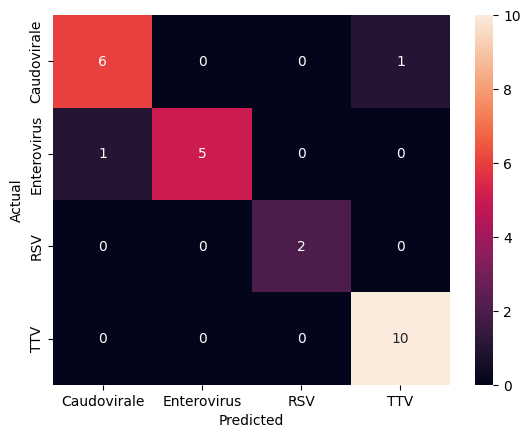

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True)
plt.show()

In [13]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Avaliar o desempenho
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

f1 = f1_score(y_test, y_test_pred, average = 'weighted')
precision = precision_score(y_test,y_test_pred, average= 'weighted')
recall = recall_score(y_test,y_test_pred, average= 'weighted')
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Acurácia no conjunto de treino: {accuracy_train}')
print(f'Acurácia no conjunto de teste: {accuracy_test}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

In [ ]:
tree = rf.estimators_[15]
dot_data = export_graphviz(tree,
                               feature_names=features,
                               filled=True,
                               impurity=False,
                               proportion=True,
                               max_depth =2,
                               class_names=y)
graph = graphviz.Source(dot_data)
display(graph)

graph.render(f"random_forest_tree_{tree}")  # Isso cria um arquivo .pdf ou .png com a árvore

In [18]:
coef =  rf.feature_importances_

In [19]:
 rf.feature_importances_[0]

0.1411526988500682

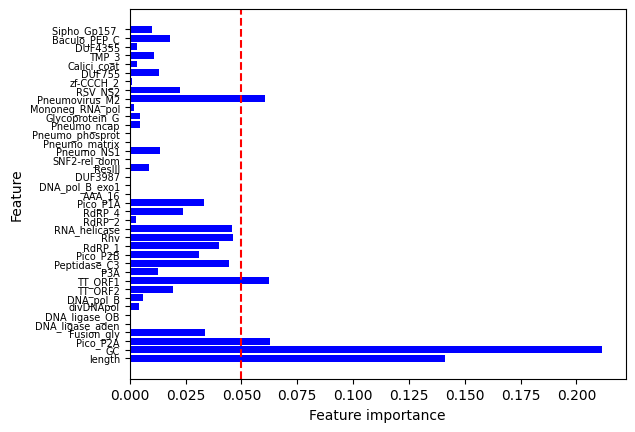

In [20]:
def plot_feature_importances(model):
 n_features = len(features)
 plt.barh(range(n_features), model.feature_importances_, align='center', color = "blue")
 plt.yticks(np.arange(n_features), features, fontsize = 7)
 plt.axvline(x=0.05, color='r', linestyle='--')
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances(rf)

In [21]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': coef})

selected_features = coefficients[coefficients['Coefficient'] != 0]['Feature']
print("Features selecionadas:")
print(selected_features) #É mt difícil um modelo de random forest nos dar 0 em algum momento
print(coefficients)

Features selecionadas:
0              length
1                  GC
2            Pico_P2A
3          Fusion_gly
6           divDNApol
7           DNA_pol_B
8             TT_ORF2
9             TT_ORF1
10                P3A
11       Peptidase_C3
12           Pico_P2B
13             RdRP_1
14                Rhv
15       RNA_helicase
16             RdRP_2
17             RdRP_4
18           Pico_P1A
19             AAA_16
22             ResIII
24         Pneumo_NS1
25      Pneumo_matrix
26    Pneumo_phosprot
27        Pneumo_ncap
28     Glycoprotein_G
29    Mononeg_RNA_pol
30     Pneumovirus_M2
31            RSV_NS2
32          zf-CCCH_2
33             DUF755
34        Calici_coat
35              TMP_3
36            DUF4355
37       Baculo_PEP_C
38       Sipho_Gp157 
Name: Feature, dtype: object
            Feature  Coefficient
0            length     0.141153
1                GC     0.211437
2          Pico_P2A     0.062866
3        Fusion_gly     0.033682
4   DNA_ligase_aden     0.000000
5 

In [22]:
# Subsetting the features which has more than 0.05 importance.
feature_subset=np.array(features)[coef>0.05]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures.
feature_subset=np.append(feature_subset, "taxname")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['length' 'GC' 'Pico_P2A' 'TT_ORF1' 'Pneumovirus_M2']
Selected Columns: ['length' 'GC' 'Pico_P2A' 'TT_ORF1' 'Pneumovirus_M2' 'taxname']


<Axes: xlabel='GC', ylabel='length'>

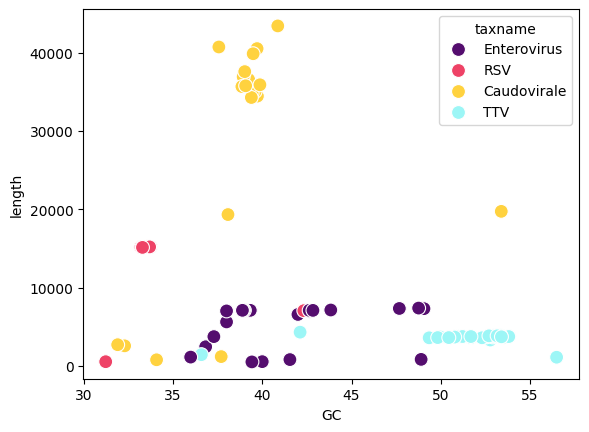

In [23]:
sns.scatterplot(data=df, x = 'GC', y = 'length',
                hue = 'taxname', marker ='o', s = 100)

In [24]:
len(feature_subset)

6

In [25]:
df_new = df[feature_subset]
df_new.head()

,length,GC,Pico_P2A,TT_ORF1,Pneumovirus_M2,taxname
0,2462,36.83,1,0,0,Enterovirus
1,554,31.23,0,0,1,RSV
2,2579,32.29,0,0,0,Caudovirale
3,2724,31.90,0,0,0,Caudovirale
4,1124,56.49,0,0,0,TTV


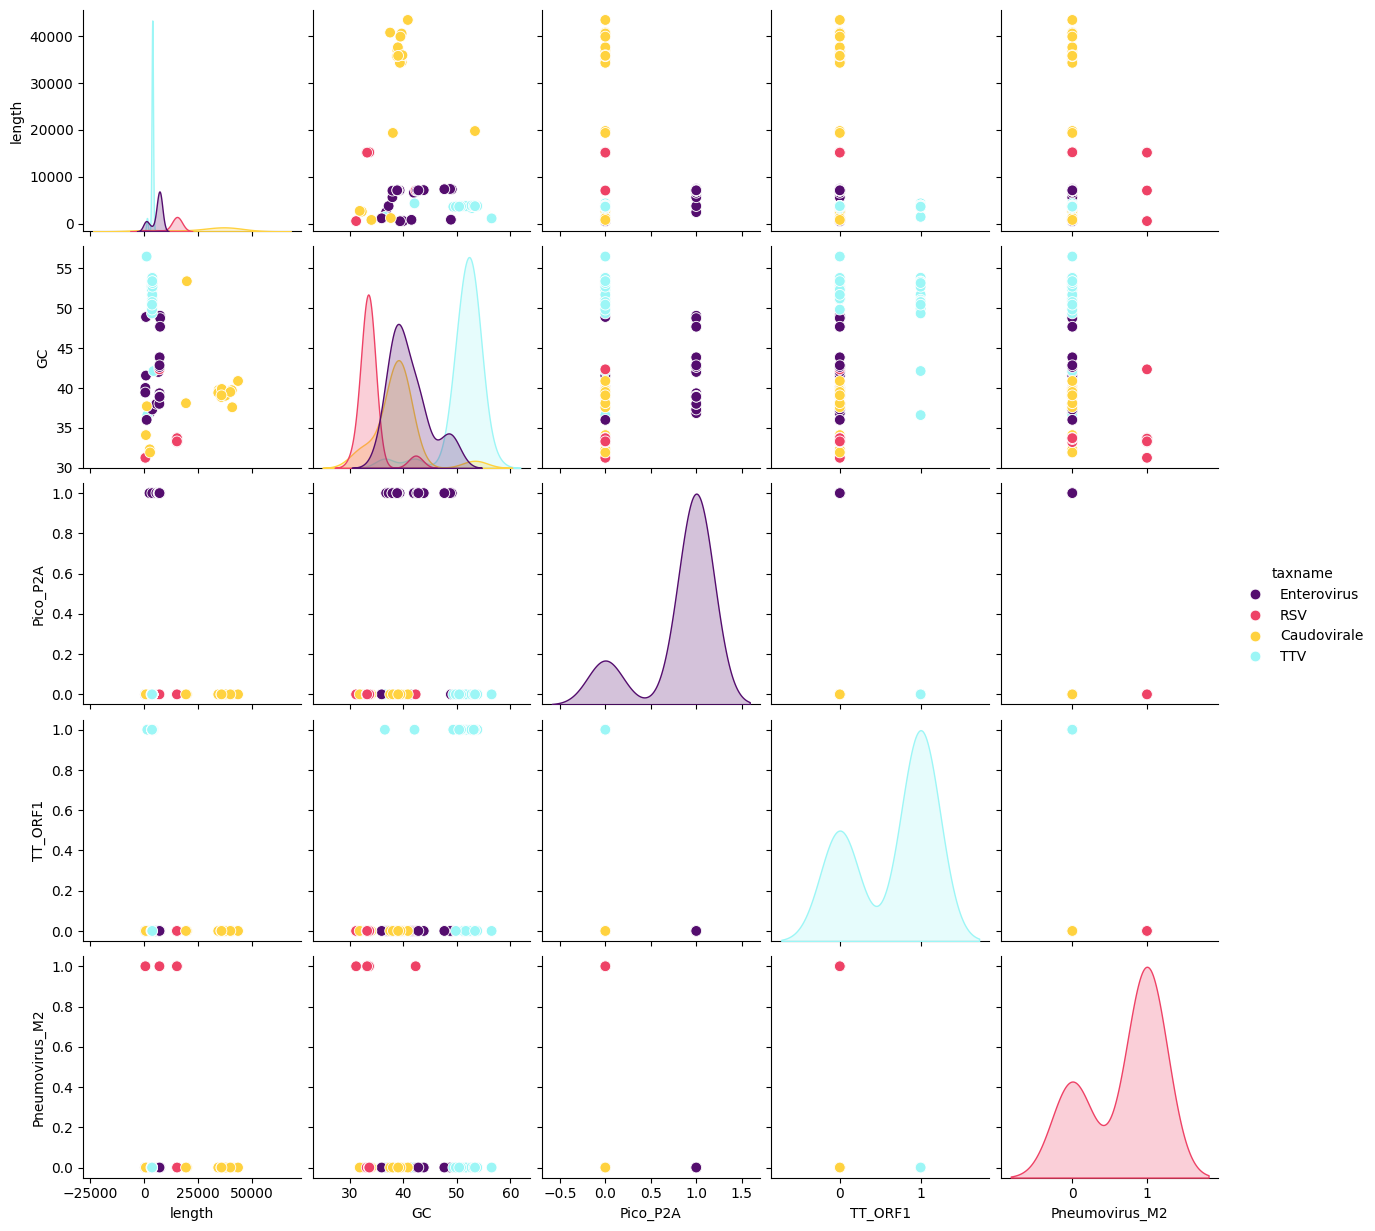

In [26]:
from pandas.plotting import scatter_matrix
import seaborn as sns

colors = ["#540D6E", "#ee4266", "#FFD23F", "#9CF6F6"]
sns.set_palette(colors)

sns.pairplot(data=df_new,
             hue = 'taxname', palette=sns.color_palette(colors, 4),
            markers = 'o', plot_kws={"s": 60})

In [33]:
from sklearn.model_selection import train_test_split

X = df_new.drop("taxname", axis=1)
y = df['taxname']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (72, 5)
Shape of Test Features: (25, 5)
Shape of Train Target: (72,)
Shape of Test Target: (25,)


In [ ]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(X.corr().abs(), annot = True, linewidth = .5, fmt = '.1f', ax = ax,cmap="Reds")

In [ ]:
#Grid Seach:

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[None, "sqrt", "log2"],
              'min_samples_leaf':[1, 1.5, 10],
              'min_samples_split':[2,2.5,10]
           }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy')
model_grid = grid.fit(X_train, y_train)

In [ ]:
best_params =model_grid.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Obtenha o melhor modelo treinado
best_rf_model = model_grid.best_estimator_

# Avalie o modelo no conjunto de teste
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do melhor modelo no conjunto de teste: {accuracy}')

In [34]:
# Treinamento de um novo modelo com as features e hiperparâmetros selecionados
new_grid_rf = RandomForestClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, max_features = "sqrt", random_state =  4)
new_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=4)

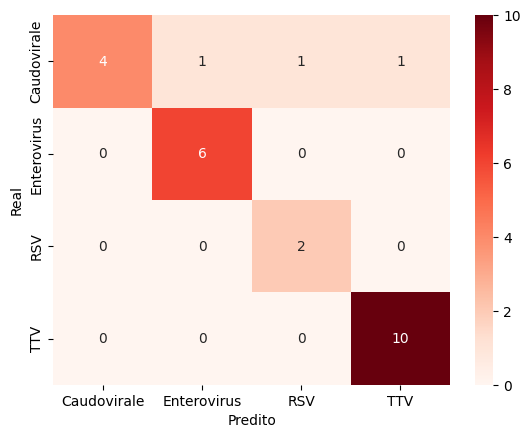

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = "Real"

df_cm.columns.name = "Predito"

sns.heatmap(df_cm, annot=True, cmap = "Reds")
plt.show()

In [32]:
# Avaliação do desempenho do novo modelo
y_pred = new_grid_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_train_pred = new_grid_rf.predict(X_train)
y_test_pred = new_grid_rf.predict(X_test)

print(f'Acurácia do novo modelo: {accuracy}')
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average = 'weighted')
precision = precision_score(y_test, y_pred, average= 'weighted')
recall = recall_score(y_test, y_pred, average= 'weighted')
mcc = matthews_corrcoef(y_test, y_test_pred)

print(f'Acurácia no conjunto de treino: {accuracy_train:.2f}')
print(f'Acurácia no conjunto de teste: {accuracy_test:.2f}')
print(f'F1 no conjunto de teste: {f1:.2f}')
print(f'Precisão no conjunto de teste: {precision:.2f}')
print(f'Revocação no conjunto de teste: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia do novo modelo: 0.88


NameError: name 'precision_score' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
labels = set(y_test)  # Todas as classes presentes

# Inicializando dicionários para armazenar métricas por classe
accuracy_per_class = {}
mcc_per_class = {}

for label in labels:
    # Converting the problem to binary: positive (current class) vs negative (all other classes)
    y_test_bin = [1 if y == label else 0 for y in y_test]
    y_pred_bin = [1 if y == label else 0 for y in y_pred]

    # Calculando acurácia para a classe atual
    accuracy_per_class[label] = accuracy_score(y_test_bin, y_pred_bin)

    # Calculando MCC para a classe atual
    mcc_per_class[label] = matthews_corrcoef(y_test_bin, y_pred_bin)

# Exibindo resultados
print("Acurácia por Classe:")
for label, acc in accuracy_per_class.items():
    print(f"Classe {label}: {acc:.2f}")

print("\nMCC por Classe:")
for label, mcc in mcc_per_class.items():
    print(f"Classe {label}: {mcc:.2f}")

In [ ]:
test = pd.read_csv('/content/drive/My Drive/DarkMatter/teste_RF.csv')
#X_new_test = X_new_test.to_numpy()
test.head(10)

,taxname,length,GC,TT_ORF1,RdRP_1,Rhv,RNA_helicase,Pneumovirus_M2
0,RSV,247,31.66,0,0,0,0,0
1,RSV,247,30.77,0,0,0,0,1
2,RSV,1068,34.65,0,0,0,0,0
3,Caudovirale,4835,35.74,0,0,0,0,0
4,RSV,157,34.43,0,0,0,0,1
5,RSV,157,29.23,0,0,0,0,1
6,RSV,157,30.04,0,0,0,0,1
7,RSV,286,33.74,0,0,0,0,1
8,TTV,1000,50.00,1,0,0,0,0
9,TTV,1000,50.00,0,0,0,0,0


In [ ]:
#Teste 2: Sem a introdução do ruído (HPV)
#retirar o ruído
test = test.drop(test[(test['taxname'] == "HPV")].index)
#df.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)

In [ ]:
X_new_test = test.drop("taxname", axis = 1).values
y_new_test = test['taxname'].values

In [ ]:
y_new_pred = new_grid_rf.predict(X_new_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


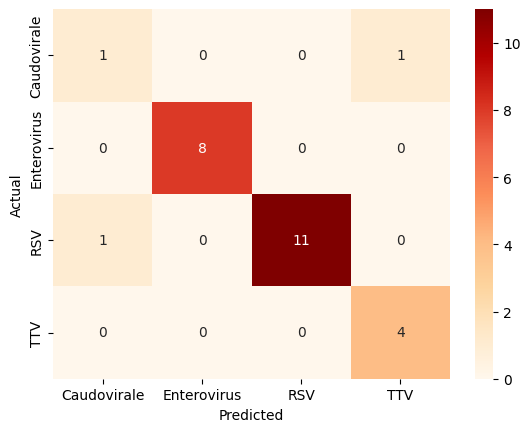

In [ ]:
cm = confusion_matrix(y_new_test,y_new_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_new_test), index = np.unique(y_new_test))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True, cmap ="OrRd")
plt.show()

In [ ]:
# Avaliar o desempenho
accuracy_test = accuracy_score(y_new_test, y_new_pred)

f1 = f1_score(y_new_test, y_new_pred, average = 'weighted')
precision = precision_score(y_new_test,y_new_pred, average= 'weighted')
recall = recall_score(y_new_test,y_new_pred, average= 'weighted')
mcc = matthews_corrcoef(y_new_test, y_new_pred)

print(f'Acurácia no conjunto de teste 2: {accuracy_test}')
print(f'F1 no conjunto de teste 2: {f1:.2f}')
print(f'Precisão no conjunto de teste 2: {precision:.2f}')
print(f'Revocação no conjunto de teste 2: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de teste 2: 0.9230769230769231
F1 no conjunto de teste 2: 0.92
Precisão no conjunto de teste 2: 0.93
Revocação no conjunto de teste 2: 0.9230769230769231
Coeficiente de Correlação de Mattwes: 0.89


In [ ]:
#Teste 3
#Com introdução do ruído (HPV)
test = pd.read_csv('/content/drive/My Drive/DarkMatter/teste_RF.csv')
#X_new_test = X_new_test.to_numpy()
test.head(10)
#test['taxname']

,taxname,length,GC,TT_ORF1,RdRP_1,Rhv,RNA_helicase,Pneumovirus_M2
0,RSV,247,31.66,0,0,0,0,0
1,RSV,247,30.77,0,0,0,0,1
2,RSV,1068,34.65,0,0,0,0,0
3,Caudovirale,4835,35.74,0,0,0,0,0
4,RSV,157,34.43,0,0,0,0,1
5,RSV,157,29.23,0,0,0,0,1
6,RSV,157,30.04,0,0,0,0,1
7,RSV,286,33.74,0,0,0,0,1
8,TTV,1000,50.00,1,0,0,0,0
9,TTV,1000,50.00,0,0,0,0,0


<Axes: xlabel='taxname', ylabel='count'>

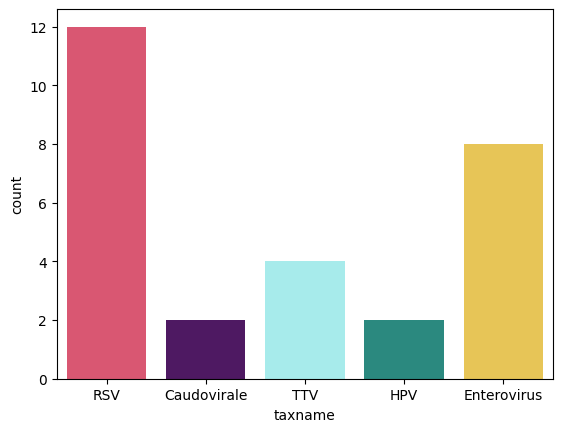

In [ ]:
#Distribuição das Classes no conjunto Teste do Mundo
colors = ["#ee4266","#540D6E","#9CF6F6" , "#1B998B", "#FFD23F"] #ruído: mais uma classe
sns.set_palette(colors)
sns.countplot(data=test, x = 'taxname', hue = 'taxname', palette=sns.color_palette(colors, 5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


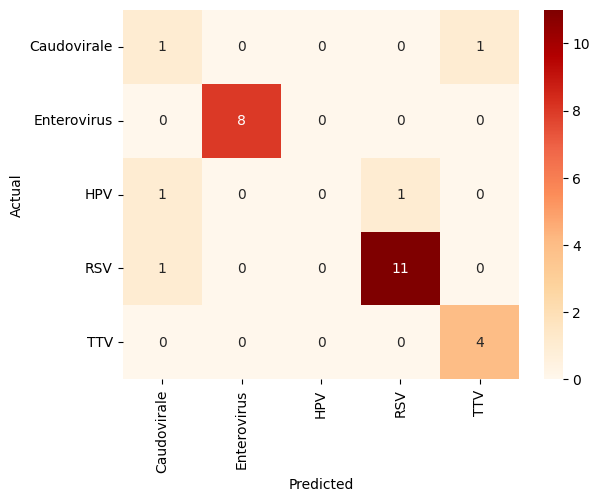

In [ ]:
X_new_test = test.drop("taxname", axis = 1).values
y_new_test = test['taxname'].values
y_new_pred = new_grid_rf.predict(X_new_test)
cm = confusion_matrix(y_new_test,y_new_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_new_test), index = np.unique(y_new_test))

df_cm.index.name = "Actual"

df_cm.columns.name = "Predicted"

sns.heatmap(df_cm, annot=True, cmap = "OrRd")
plt.show()

In [ ]:
# Avaliar o desempenho
accuracy_test = accuracy_score(y_new_test, y_new_pred)

f1 = f1_score(y_new_test, y_new_pred, average = 'weighted')
precision = precision_score(y_new_test,y_new_pred, average= 'weighted')
recall = recall_score(y_new_test,y_new_pred, average= 'weighted')
mcc = matthews_corrcoef(y_new_test, y_new_pred)

print(f'Acurácia no conjunto de teste 3: {accuracy_test}')
print(f'F1 no conjunto de teste 3: {f1:.2f}')
print(f'Precisão no conjunto de teste 3: {precision:.2f}')
print(f'Revocação no conjunto de teste 3: {recall}')
print(f'Coeficiente de Correlação de Mattwes: {mcc:.2f}')

Acurácia no conjunto de teste 3: 0.8571428571428571
F1 no conjunto de teste 3: 0.83
Precisão no conjunto de teste 3: 0.82
Revocação no conjunto de teste 3: 0.8571428571428571
Coeficiente de Correlação de Mattwes: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
features=df_new.drop("taxname", axis=1).columns

In [ ]:
tree = new_grid_rf.estimators_[78]

export_graphviz(tree, out_file="tree.dot", class_names= y ,
 feature_names=features, impurity=False, filled=True)

#graph.render(f"random_forest_tree_{tree}")  # Isso cria um arquivo .pdf ou .png com a árvore

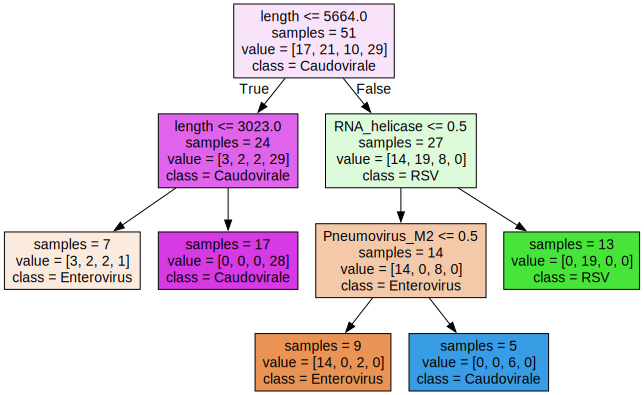

In [ ]:
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)